# 1.
Please load ‘data.mat’ into your Python code, where you will find $ 𝑥, 𝑦 ∈ 𝑅^{1001} $.
Please use the loss function (L1 Norm) below to find the curve 𝑦 = $𝜃_𝟎 + 𝑥𝜃_𝟏 + 𝑥^
2𝜃_𝟐$
that best approximates 𝑦 based on 𝑥. (upload your source code to moodle, and show the
results, including a plot where the line is overlaid over the given data in the report)
𝐿𝑜𝑠𝑠 𝐹𝑢𝑛𝑐𝑡𝑖𝑜𝑛: 𝑓(𝜽) =$ ∑|𝑦_𝑖 − (𝜃_𝟎 + 𝑥𝜃_𝟏 + 𝑥
^2𝜃_𝟐)|$

a, b, c = 5.5811439250000054 0.2967090000000458 1.0283999999999953


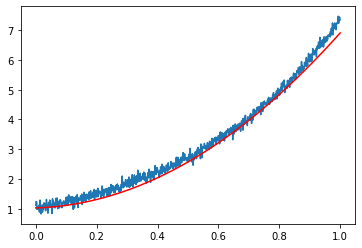

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

data = loadmat('D:\DL\HW2\data.mat')
# print(data)
x,y = data['x'], data['y']

epoch = 2000
learning_rate = 0.0003
a=1
b=0
c=0
plt.plot(x,y)
for i in range(epoch):
    y_pred = a*x*x + b*x + c
    lad = np.sign(y - y_pred)
    d_a = sum(-lad*x*x)
    d_b = sum(-lad*x)
    d_c = sum(-lad*1)
    
    a =a- learning_rate*d_a
    b =b- learning_rate*d_b
    c =c- learning_rate*d_c
print('a, b, c =',a[0],b[0],c[0])
y_pred = a*x*x + b*x + c
plt.plot(x,y_pred,'r-')
plt.show()

# 2.
In ‘train.mat,’ you can find 2-D points $X=[x1, x2]$ and their corresponding labels $Y=y$.
Please use logistic regression $ℎ(𝜽) = \frac{1}{1+𝑒^{−𝜽^{𝑇_𝑥}}} $ to find the decision boundary
(optimal $𝜽^∗$ ) based on ‘train.mat.” Report the test error on the test dataset ‘test.mat.’
(percentage of misclassified test samples) 
Hint: you can use “LogisticRegression” in Python.

Coefficient: [[-1.93360539  3.27369815]]
Interception: [0.38541225]
misclassified 0.033333333333333326


C:\Users\zhich\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


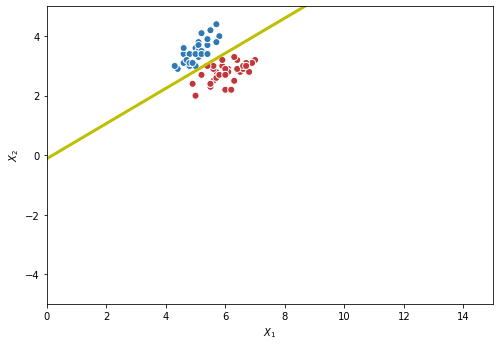

In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

train = loadmat(r'D:\DL\HW2\train.mat')
test = loadmat(r'D:\DL\HW2\test.mat')
#print(train)
x1_train,x2_train, y_train= train['x1'],train['x2'],train['y']
#print(x1_train.shape,'\n',x2_train.shape,'\n',y_train.shape)
x_train=np.hstack([x1_train,x2_train])

x1_test,x2_test, y_test=test['x1'],test['x2'],test['y']
x_test=np.hstack([x1_test,x2_test])

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

lr = LogisticRegression()
lr.fit(x_train, y_train.ravel())
y_pred = lr.predict(x_test)
print('Coefficient:',lr.coef_)
print('Interception:',lr.intercept_)
print('misclassified',1-lr.score(x_test,y_test))

xx, yy = np.mgrid[0:15:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1_train, x2_train, c=y_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(0, 15), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

s = np.linspace(0.0, 10.0, num=70)
line = -lr.coef_[0][0] / lr.coef_[0][1] * s - lr.intercept_ / lr.coef_[0][1] 

plt.plot(s,line,'-y',linewidth=3)

# 3.
Please use a gradient descent method to solve Question 2. (show your code,decision boundary, and test error on the test dataset)

a, b, c = 0.7314399999999928 -0.3922199999999978 -0.032399999999999804
2 30
misclassified: 0.06666666666666667


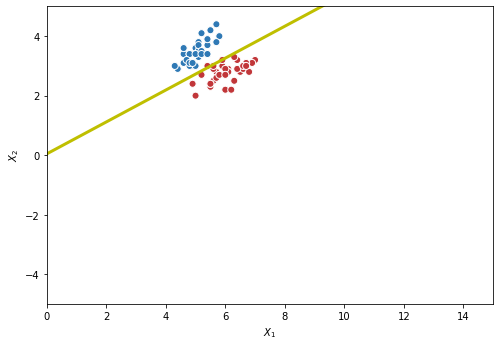

In [13]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

data = loadmat(r'D:\DL\HW2\train.mat')
test = loadmat(r'D:\DL\HW2\test.mat')

x1,x2, y = data['x1'],data['x2'],data['y']
xt1,xt2, yt = test['x1'],test['x2'],test['y']
a = 1
b = 0
c = 0
n = len(data['x1'])
epoch = 1000
lr = 0.0003
for i in range(epoch):
    y_pred = a * x2 + b*x1 + c
    sign = np.sign(y - y_pred)
    d_a = sum(-sign*x2)
    d_b = sum(-sign*x1)
    d_c = sum(-sign*1)
    
    a =a- lr * d_a
    b =b- lr * d_b
    c =c- lr * d_c


print('a, b, c =',a[0],b[0],c[0]) #a=5.98 b=0.2
y_pred = a*xt2 + b*xt1 + c 

miss_count=0
for i in range(len(yt)):
    if y_pred[i]>0:
        y_pred[i]=1
    else:
        y_pred[i]=0
        
    if not y_pred[i] ==yt[i][0]:
        miss_count+=1
print(miss_count,len(yt))
print('misclassified:',miss_count/len(yt))

##圖
xx, yy = np.mgrid[0:15:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]


f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x1, x2, c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(0, 15), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

s = np.linspace(0.0, 10.0, num=70)
line = -b / a * s - c / a
plt.plot(s,line,'-y',linewidth=3)


# 4.
 (15%, for bonus) Please use a neural network (with its architecture shown below)
to find the decision boundary based on ‘train.mat.” The activation function must be used
in the two hidden layers and the output layer. You are required to use a gradient descent
method to train the network. Report the test error on the test dataset ‘test.mat.’
(percentage of misclassified test samples) Note that if you use any off-the-shelf functions
to construct and optimize your network model, the most points you can get is 30% out of
35%. If choosing to implement a neural network model by yourself (no built-in functions
used), you will get the extra credit of at most 15%. 

In [15]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Sigmoid is used as the activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x)*(1.0 - sigmoid(x))

class NeuralNetwork(object):
    
    def __init__(self, architecture):
        #architecture - numpy array with ith element representing the number of neurons in the ith layer.
        
        #Initialize the network architecture
        self.L = architecture.size - 1 #L corresponds to the last layer of the network.
        self.n = architecture #n stores the number of neurons in each layer
        #input_size is the number of neurons in the first layer i.e. n[0]
        #output_size is the number of neurons in the last layer i.e. n[L]
        
        #Parameters will store the network parameters, i.e. the weights and biases
        self.parameters = {}
        
        #Initialize the network weights and biases:
        for i in range (1, self.L + 1): 
            #Initialize weights to small random values
            self.parameters['W' + str(i)] = np.random.randn(self.n[i], self.n[i - 1]) * 0.01
            
            #Initialize rest of the parameters to 1
            self.parameters['b' + str(i)] = np.ones((self.n[i], 1))
            self.parameters['z' + str(i)] = np.ones((self.n[i], 1))
            self.parameters['a' + str(i)] = np.ones((self.n[i], 1))
        
        #As we started the loop from 1, we haven't initialized a[0]:
        self.parameters['a0'] = np.ones((self.n[i], 1))
        
        #Initialize the cost:
        self.parameters['C'] = 1
        
        #Create a dictionary for storing the derivatives:
        self.derivatives = {}
                    
    def forward_propagate(self, X):
        #Note that X here, is just one training example
        self.parameters['a0'] = X
        
        #Calculate the activations for every layer l
        for l in range(1, self.L + 1):
            self.parameters['z' + str(l)] = np.add(np.dot(self.parameters['W' + str(l)], self.parameters['a' + str(l - 1)]), self.parameters['b' + str(l)])
            self.parameters['a' + str(l)] = sigmoid(self.parameters['z' + str(l)])
        
    def compute_cost(self, y):
        self.parameters['C'] = -(y*np.log(self.parameters['a' + str(self.L)]) + (1-y)*np.log( 1 - self.parameters['a' + str(self.L)]))
    
    def compute_derivatives(self, y):
        #Partial derivatives of the cost function with respect to z[L], W[L] and b[L]:        
        #dzL
        self.derivatives['dz' + str(self.L)] = self.parameters['a' + str(self.L)] - y
        #dWL
        self.derivatives['dW' + str(self.L)] = np.dot(self.derivatives['dz' + str(self.L)], np.transpose(self.parameters['a' + str(self.L - 1)]))
        #dbL
        self.derivatives['db' + str(self.L)] = self.derivatives['dz' + str(self.L)]

        #Partial derivatives of the cost function with respect to z[l], W[l] and b[l]
        for l in range(self.L-1, 0, -1):
            self.derivatives['dz' + str(l)] = np.dot(np.transpose(self.parameters['W' + str(l + 1)]), self.derivatives['dz' + str(l + 1)])*sigmoid_prime(self.parameters['z' + str(l)])
            self.derivatives['dW' + str(l)] = np.dot(self.derivatives['dz' + str(l)], np.transpose(self.parameters['a' + str(l - 1)]))
            self.derivatives['db' + str(l)] = self.derivatives['dz' + str(l)]
            
    def update_parameters(self, alpha):
        for l in range(1, self.L+1):
            self.parameters['W' + str(l)] -= alpha*self.derivatives['dW' + str(l)]
            self.parameters['b' + str(l)] -= alpha*self.derivatives['db' + str(l)]
        
    def predict(self, x):
        self.forward_propagate(x)
        return self.parameters['a' + str(self.L)]
        
    def fit(self, X, Y, num_iter, alpha = 0.01):
        for iter in range(0, num_iter):
            c = 0 #Stores the cost
            n_c = 0 #Stores the number of correct predictions
            
            for i in range(0, X.shape[0]):
              x = X[i].reshape((X[i].size, 1))
              y = Y[i]

              self.forward_propagate(x)
              self.compute_cost(y)
              self.compute_derivatives(y)
              self.update_parameters(alpha)

              c += self.parameters['C'] 

              y_pred = self.predict(x)
              #y_pred is the probability, so to convert it into a class value:
              y_pred = (y_pred > 0.5) 

              if y_pred == y:
                  n_c += 1
            
            c = c/X.shape[0]
            print('Iteration: ', iter)
            print("Cost: ", c)
            print("Accuracy:", (n_c/X.shape[0])*100)

# #Importing the dataset        
data = loadmat(r'D:\DL\HW2\train.mat')
test_data = loadmat(r'D:\DL\HW2\test.mat')
test_x1, test_x2, test_y = test_data['x1'],test_data['x2'], test_data['y']
x1, x2, y = data['x1'],data['x2'], data['y']

x=np.hstack([x1,x2])
test_c_x=np.hstack([test_x1,test_x2])

#Defining the model architecture
architecture = np.array([2, 3, 2, 1])

#Creating the classifier
classifier = NeuralNetwork(architecture)

#Training the classifier
classifier.fit(x, y, 1200)

#Predicting the test set results:
n_c = 0
for i in range(0, test_c_x.shape[0]):
  x = test_c_x[i].reshape((test_c_x[i].size, 1))
  y = test_y[i]
  y_pred = classifier.predict(x)
  y_pred = (y_pred > 0.5)
  if y_pred == y:
      n_c += 1

print("Test Accuracy", (n_c/test_c_x.shape[0])*100)

Iteration:  0
Cost:  [[0.77585691]]
Accuracy: 50.0
Iteration:  1
Cost:  [[0.7268396]]
Accuracy: 50.0
Iteration:  2
Cost:  [[0.70363802]]
Accuracy: 50.0
Iteration:  3
Cost:  [[0.69397363]]
Accuracy: 50.0
Iteration:  4
Cost:  [[0.69071597]]
Accuracy: 50.0
Iteration:  5
Cost:  [[0.69020043]]
Accuracy: 57.14285714285714
Iteration:  6
Cost:  [[0.69069824]]
Accuracy: 57.14285714285714
Iteration:  7
Cost:  [[0.69145554]]
Accuracy: 55.714285714285715
Iteration:  8
Cost:  [[0.69217694]]
Accuracy: 55.714285714285715
Iteration:  9
Cost:  [[0.69276978]]
Accuracy: 55.714285714285715
Iteration:  10
Cost:  [[0.69322416]]
Accuracy: 55.714285714285715
Iteration:  11
Cost:  [[0.69355922]]
Accuracy: 54.285714285714285
Iteration:  12
Cost:  [[0.69380065]]
Accuracy: 54.285714285714285
Iteration:  13
Cost:  [[0.69397207]]
Accuracy: 54.285714285714285
Iteration:  14
Cost:  [[0.69409264]]
Accuracy: 52.85714285714286
Iteration:  15
Cost:  [[0.69417691]]
Accuracy: 52.85714285714286
Iteration:  16
Cost:  [[0.694